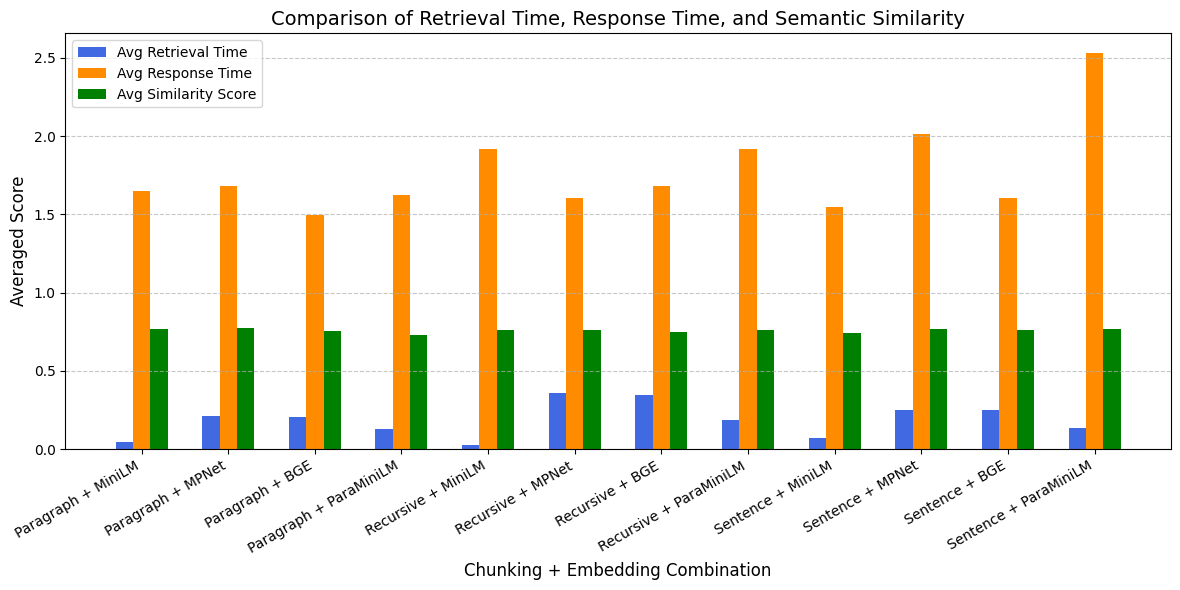

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Load CSV file
csv_file = "rag_evaluation_results.csv"  # Ensure this file exists
df = pd.read_csv(csv_file)
# Drop non-numeric columns before aggregation
numeric_columns = ["Retrieval Time (s)", "Response Time (s)", "Semantic Similarity Score"]
df_grouped = df.groupby(["Chunking Strategy", "Embedding Model"])[numeric_columns].mean().reset_index()
# Shortened Names Mapping
chunking_short_names = {
   "RecursiveTextSplitter": "Recursive",
   "TokenTextSplitter": "Token",
   "SentenceSplitter": "Sentence",
   "ParagraphSplitter": "Paragraph",
}
embedding_short_names = {
   "all-MiniLM-L6-v2": "MiniLM",
   "all-mpnet-base-v2": "MPNet",
   "paraphrase-multilingual-MiniLM-L12-v2": "ParaMiniLM",
   "bge-base-en": "BGE",
}
# Apply short names
df_grouped["Chunking Strategy"] = df_grouped["Chunking Strategy"].map(chunking_short_names)
df_grouped["Embedding Model"] = df_grouped["Embedding Model"].map(embedding_short_names)
# Combine short names for x-axis labels
df_grouped["Combination"] = df_grouped["Chunking Strategy"] + " + " + df_grouped["Embedding Model"]
# Plot Grouped Bar Chart
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2  # Space between bars in a group
x = np.arange(len(df_grouped["Combination"]))  # X positions
# Plot each metric as separate bars for each combination
ax.bar(x - bar_width, df_grouped["Retrieval Time (s)"], bar_width, label="Avg Retrieval Time", color="royalblue")
ax.bar(x, df_grouped["Response Time (s)"], bar_width, label="Avg Response Time", color="darkorange")
ax.bar(x + bar_width, df_grouped["Semantic Similarity Score"], bar_width, label="Avg Similarity Score", color="green")
# Formatting
ax.set_xlabel("Chunking + Embedding Combination", fontsize=12)
ax.set_ylabel("Averaged Score", fontsize=12)
ax.set_title("Comparison of Retrieval Time, Response Time, and Semantic Similarity", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(df_grouped["Combination"], rotation=30, ha="right", fontsize=10)  # Rotated for readability
ax.legend()  # Show legend
ax.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

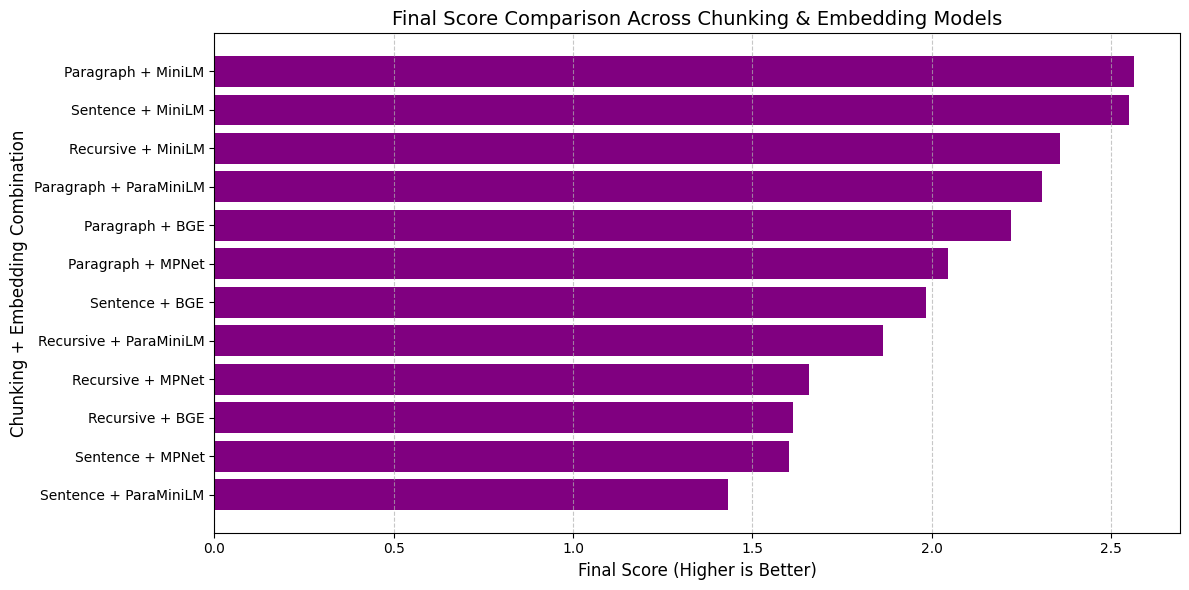

In [5]:
# Load CSV file
csv_file = "rag_evaluation_results.csv"  # Ensure this file exists
df = pd.read_csv(csv_file)
# Drop non-numeric columns before aggregation
numeric_columns = ["Retrieval Time (s)", "Response Time (s)", "Semantic Similarity Score"]
df_grouped = df.groupby(["Chunking Strategy", "Embedding Model"])[numeric_columns].mean().reset_index()
# Shortened Names Mapping
chunking_short_names = {
   "RecursiveTextSplitter": "Recursive",
   "TokenTextSplitter": "Token",
   "SentenceSplitter": "Sentence",
   "ParagraphSplitter": "Paragraph",
}
embedding_short_names = {
   "all-MiniLM-L6-v2": "MiniLM",
   "all-mpnet-base-v2": "MPNet",
   "paraphrase-multilingual-MiniLM-L12-v2": "ParaMiniLM",
   "bge-base-en": "BGE",
}
# Apply short names
df_grouped["Chunking Strategy"] = df_grouped["Chunking Strategy"].map(chunking_short_names)
df_grouped["Embedding Model"] = df_grouped["Embedding Model"].map(embedding_short_names)
# Normalize Retrieval & Response Times (Min-Max Scaling)
df_grouped["Norm Retrieval Time"] = 1 - (df_grouped["Retrieval Time (s)"] - df_grouped["Retrieval Time (s)"].min()) / (df_grouped["Retrieval Time (s)"].max() - df_grouped["Retrieval Time (s)"].min())
df_grouped["Norm Response Time"] = 1 - (df_grouped["Response Time (s)"] - df_grouped["Response Time (s)"].min()) / (df_grouped["Response Time (s)"].max() - df_grouped["Response Time (s)"].min())
# Compute Final Score using the balanced formula
df_grouped["Final Score"] = (
   df_grouped["Norm Retrieval Time"] +  
   df_grouped["Norm Response Time"] +  
   df_grouped["Semantic Similarity Score"]  
)
# Sort by Final Score (Descending)
df_grouped = df_grouped.sort_values(by="Final Score", ascending=False)
# Combine short names for x-axis labels
df_grouped["Combination"] = df_grouped["Chunking Strategy"] + " + " + df_grouped["Embedding Model"]
# Plot Final Score
plt.figure(figsize=(12, 6))
plt.barh(df_grouped["Combination"], df_grouped["Final Score"], color="purple")
plt.xlabel("Final Score (Higher is Better)", fontsize=12)
plt.ylabel("Chunking + Embedding Combination", fontsize=12)
plt.title("Final Score Comparison Across Chunking & Embedding Models", fontsize=14)
plt.gca().invert_yaxis()  #Highest score at top
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()